### Reading the dataset

In [17]:
import numpy as np
import pandas as pd

datatrain1=pd.read_csv('ethylene_CO.csv')
datatrain2=pd.read_csv('ethylene_methane.csv')

### Change dataframe to array

In [18]:
X1=np.array(datatrain1)
X2=np.array(datatrain2)

array_list=[X1,X2]
sample = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]
datatrain_array=np.vstack(array_list)

### Split x and y (feature and target)

In [19]:
from sklearn.preprocessing import MaxAbsScaler

xtrain = datatrain_array

#Setting the target value 0 for ethylene_CO and 1 for ethylene_mehtane
y1=np.zeros(1048574)
y2=np.ones(1048574)
ytrain=np.concatenate([y1,y2])

max_abs_scaler = MaxAbsScaler()
xtrain = max_abs_scaler.fit_transform(xtrain) 

### Train and test split

In [20]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=.001,random_state=1)

#changing target format
y_train = np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


### Neural Network

In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(129, input_dim=19, init='uniform', activation='relu'))
model.add(Dense(50, init='uniform', activation='relu'))
model.add(Dense(80, init='uniform', activation='relu'))
model.add(Dense(2, init='uniform', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['mse','mae','mape','acc'])
MLP=model.fit(X_train, y_train, epochs=1000, batch_size=150000,validation_split=0.001, verbose=0)
y_pred = model.predict(X_test)
accuracy=np.array(MLP.history['acc'])

print('ground truth     : ',y_test)
print('predicted class  : ', y_pred)
print('model accuracy   : ',accuracy[999])

C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(129, input_dim=19, activation="relu", kernel_initializer="uniform")`
  """
C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, activation="relu", kernel_initializer="uniform")`
  
C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(80, activation="relu", kernel_initializer="uniform")`
  import sys
C:\Users\nafi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2, activation="softmax", kernel_initializer="uniform")`
  


ground truth     :  [[ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]]
predicted class  :  [[  6.47816911e-09   1.00000000e+00]
 [  1.00000000e+00   3.25940948e-21]
 [  5.32175856e-20   1.00000000e+00]
 ..., 
 [  1.07577599e-18   1.00000000e+00]
 [  1.00000000e+00   4.51319815e-33]
 [  1.00000000e+00   3.17965697e-36]]
model accuracy   :  1.0


### Plotting model accuracy and loss

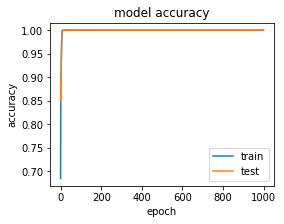

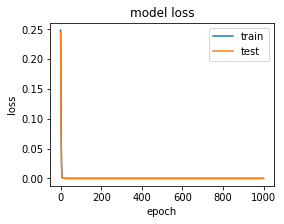

In [22]:
import matplotlib.pyplot as plt

# summarize history for accuracy
fig = plt.figure(figsize=(4,3))
plt.plot(MLP.history['acc'])
plt.plot(MLP.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
rootdir = 'F:/OneDrive/Research & Study/Thesis Writing/mlp_acc.png'
plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=11)
plt.show()

# summarize history for loss
fig = plt.figure(figsize=(4,3))
plt.plot(MLP.history['mean_squared_error'])
plt.plot(MLP.history['val_mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
rootdir = 'F:/OneDrive/Research & Study/Thesis Writing/mlp_loss.png'
plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=11)
plt.show()
